# Explore new dataset

In [2]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image

In [3]:
path = Path('../dataset/oldsmiledata')

In [4]:
dataset = '../dataset/oldsmiledata'
IMAGES = dataset + '/mol_images/all/'

In [5]:
train = pd.read_csv(path/'train_oldsmiledata_id_processed_transformed_shuffled.csv')
train.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_template_NumHDonors,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity
0,1YPJ_UIB,1K22_MEL,4.643,P00734,CC[C@@H]1[C@@H]2[C@H](C(=O)N1Cc1ccc3c(c1)OCO3)...,N=C(N)c1ccc(CNC(=O)[C@@H]2CCN2C(=O)[C@H](NCC(=...,[#7]=[#6](-[#7])-[#6]1:[#6]:[#6]:[#6](:[#6]:[#...,33,3,7,...,2,3,4,7,0.165775,0.289941,1.535361,3,-0.342246,-0.100592
1,2JH5_895,1C5O_BAM,3.209,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,NC(=[NH2+])c1ccccc1,"[#7]-[#6]-[#6]:,-[#6]:,-[#6]",28,1,8,...,0,1,0,1,0.050847,0.059829,1.165959,3,-1.491525,-2.401709
2,5Y12_8JX,1TOW_CRZ,1.769,P15090,COc1ccc(S(=O)(=O)NCCCCC(=O)O)c2ccccc12,O=C(O)CCCn1c2ccccc2c2ccccc21,[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1:[#6]:[#6]:[#6...,23,2,6,...,0,0,0,0,0.324561,0.324561,0.570414,1,1.245614,0.245614
3,1C1U_BAI,5AHG_Y4L,3.943,P00734,N=C(N)c1ccc2[nH]c(Cc3nc4ccccc4[nH]3)nc2c1,CN(C)S(=O)(=O)Nc1ccc(Cl)cc1,"[#7]-,:[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1",22,5,6,...,1,1,0,1,0.086957,0.106195,1.371942,3,-1.130435,-1.938053
4,2W26_RIV,2Y80_439,7.217,P00742,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,CN(C)[C@@H]1CCc2cc(N3CC[C@H](NS(=O)(=O)c4ccc5c...,[#7]-[#6]-[#6]-[#6]-[#7](-[#6]1:[#6]:[#6]:[#6]...,29,1,8,...,1,1,3,2,0.187166,0.283237,1.976439,3,-0.128342,-0.167630


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   template                        23924 non-null  object 
 1   docked                          23924 non-null  object 
 2   rmsd                            23924 non-null  float64
 3   uniprot_id                      23924 non-null  object 
 4   smiles_template                 23924 non-null  object 
 5   smiles_docked                   23924 non-null  object 
 6   mcs_smartsString                23924 non-null  object 
 7   template_HeavyAtomCount         23924 non-null  int64  
 8   template_NHOHCount              23924 non-null  int64  
 9   template_NOCount                23924 non-null  int64  
 10  template_RingCount              23924 non-null  int64  
 11  template_NumHAcceptors          23924 non-null  int64  
 12  template_NumHDonors             

In [8]:
test = pd.read_csv(path/'test_oldsmiledata_id_processed_transformed_shuffled.csv')
test.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_template_NumHDonors,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity
0,2C8Y_C3M,3SHC_B01,6.732,P00734,N[C@@H](Cc1ccccc1)[C@H](O)CNS(=O)(=O)c1ccc2ccc...,N[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)NCc1cc(C...,[#7]-[#6](-[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]...,26,4,5,...,1,1,3,3,0.240260,0.308219,1.906872,3,0.402597,0.082192
1,2D1J_D01,1LPZ_CMB,7.109,P00742,O=C(c1cc2c(ccc[n+]2[O-])s1)N1CCN(S(=O)(=O)c2cc...,Cc1cccc2c1cc(C(=O)NCc1cc(Cl)cc(Cl)c1)n2Cc1cccc...,"[#6](:[#6]:[#6]:[#6]:,-[#6]:,-[#7](:,-[#6]-[#6...",31,1,8,...,0,1,2,3,0.147959,0.203209,1.961362,3,-0.520408,-0.967914
2,4A7I_A7I,1NFX_RDR,7.520,P00742,CC(C)N1CCC(NS(=O)(=O)CCNC(=O)c2ccc(Cl)s2)CC1,O=C1CN(S(=O)(=O)c2cc3ccc(Cl)cc3s2)CCN1Cc1cc2cn...,"[#6]-[#6](-,:[#6])-,:[#7](-,:[#6]-,:[#6]-,:[#6...",24,2,6,...,1,0,2,3,0.137143,0.177515,2.017566,3,-0.628571,-1.224852
3,1ZGV_501,1C5O_BAM,3.197,P00734,CCCCNc1cc(C)nc2nc(Nc3cc(Cl)ccc3C)nn12,NC(=[NH2+])c1ccccc1,"[#7]-[#6]-,:[#6](:[#6]:[#6]:[#6]:[#6]):,-[#6]",24,2,6,...,1,1,1,1,0.064815,0.127451,1.162213,3,-1.351852,-1.725490
4,3DA6_BZ9,4W4V_3H8,11.188,P53779,CNc1nccc(-c2cccnc2Oc2c(C)cc(Nc3nc4ccccc4[nH]3)...,Cc1cc(NC(=O)c2cccc(-n3cc(NC(=O)Nc4ccccc4Cl)cn3...,"[#7]:[#6]:[#6](-,:[#7]-,:[#6]-[#7]-[#6]1:[#6]:...",36,3,8,...,2,2,2,2,0.190698,0.213270,2.414842,3,-0.093023,-0.867299


In [7]:
len(test)/len(train)

0.04280220698879786

In [9]:
#df = pd.concat([train, test])
df = train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   template                        23924 non-null  object 
 1   docked                          23924 non-null  object 
 2   rmsd                            23924 non-null  float64
 3   uniprot_id                      23924 non-null  object 
 4   smiles_template                 23924 non-null  object 
 5   smiles_docked                   23924 non-null  object 
 6   mcs_smartsString                23924 non-null  object 
 7   template_HeavyAtomCount         23924 non-null  int64  
 8   template_NHOHCount              23924 non-null  int64  
 9   template_NOCount                23924 non-null  int64  
 10  template_RingCount              23924 non-null  int64  
 11  template_NumHAcceptors          23924 non-null  int64  
 12  template_NumHDonors             

In [10]:
df.rmsd.mean()

5.626843629827801

In [11]:
df.bin_RMSD.unique()

array([3, 1, 2])

In [12]:
df.log_RMSD.mean()

1.443270973118679

In [13]:
df.template.nunique(), df.docked.nunique()

(1050, 1064)

# Create images and checks

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import AllChem

ModuleNotFoundError: No module named 'rdkit'

In [14]:
df.iloc[2].template

'5Y12_8JX'

In [15]:
template, template_name = df.iloc[0].smiles_template , df.iloc[0].template
template, template_name

('CC[C@@H]1[C@@H]2[C@H](C(=O)N1Cc1ccc3c(c1)OCO3)[C@H](c1ccc(C(=N)N)cc1)N(C)C2(C)C',
 '1YPJ_UIB')

In [16]:
%%time
mol_temp = Chem.MolFromSmiles(template)
mol_temp

NameError: name 'Chem' is not defined

In [17]:
%%time
docked, docked_name = df[0:1].smiles_docked[0], df[0:1].docked[0]
mol_docked = Chem.MolFromSmiles(docked)
mol_docked

NameError: name 'Chem' is not defined

In [18]:
%%time
img = Chem.Draw.MolsToGridImage([mol_temp, mol_docked],molsPerRow=2,subImgSize=(224,224),legends=[template_name, docked_name])
img

NameError: name 'Chem' is not defined

In [19]:
df_candidates = df[df.rmsd < 2]

In [20]:
%%time
for i in range(0,11):
    template, template_name = df.iloc[i].smiles_template , df.iloc[i].template
    mol_temp = Chem.MolFromSmiles(template)
    docked, docked_name = df.iloc[i].smiles_docked, df.iloc[i].docked
    mol_docked = Chem.MolFromSmiles(docked)
    img = Chem.Draw.MolsToGridImage([mol_temp, mol_docked],molsPerRow=2,subImgSize=(224,224),legends=[template_name, docked_name])
    img.save('test.png')
    imgplot = plt.imshow(img)
    plt.show()

NameError: name 'Chem' is not defined

# Check for substructures

In [21]:
df_candidates = df[df.rmsd < 1]
template, template_name = df_candidates.iloc[0].smiles_template , df_candidates.iloc[0].template
mol = Chem.MolFromSmiles(template)
docked, docked_name = df_candidates.iloc[0].smiles_docked, df_candidates.iloc[0].docked
patt = Chem.MolFromSmiles(docked)
img = Chem.Draw.MolsToGridImage([mol, patt],molsPerRow=2,subImgSize=(224,224),legends=[template_name, docked_name])
img

NameError: name 'Chem' is not defined

In [22]:
df_sorted = df.sort_values('rmsd')
df_sorted.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_template_NumHDonors,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity
204,4Q4Q_SAQ,3S1G_ITE,0.099,P28720,O=c1[nH]cnc2cc3nc(NCc4cccs4)[nH]c3cc12,CNc1nc2cc3nc[nH]c(=O)c3cc2[nH]1,[#6]-[#7]-[#6]1:[#7]:[#6]2:[#6](:[#7]:1):[#6]:...,21,3,6,...,3,3,2,1,0.579545,0.674699,-2.312635,1,3.795455,3.746988
18940,3GE7_AFQ,3C2Y_S60,0.123,P28720,CNc1nc2c(CCNCC3CCCC3)c3nc(N)[nH]c(=O)c3cc2[nH]1,Cc1nc2cc3nc(N)[nH]c(=O)c3cc2[nH]1,[#6]1:[#7]:[#6]2:[#6](:[#7]:1):[#6]:[#6]1:[#6]...,26,6,8,...,3,3,0,0,0.254098,0.353982,-2.095571,1,0.540984,0.539823
17449,4Q4O_2YM,3C2Y_S60,0.135,P28720,Nc1nc(=O)c2cc3nc(NCCN4CCCCC4)[nH]c3cc2[nH]1,Cc1nc2cc3nc(N)[nH]c(=O)c3cc2[nH]1,[#6]1:[#7]:[#6]2:[#6](:[#7]:1):[#6]:[#6]1:[#6]...,24,5,8,...,3,3,0,0,0.254237,0.275862,-2.002481,1,0.542373,-0.241379
8834,2QII_PQ0,2PWU_GUN,0.141,P28720,N#Cc1c[nH]c2nc(N)[nH]c(=O)c12,Nc1nc2[nH]cnc2c(=O)[nH]1,[#7]-[#6]1:[#7]:[#6](:[#7]:[#6]):[#6]:[#6](:[#...,13,4,6,...,3,3,0,0,0.349206,0.349206,-1.958995,1,1.492063,0.492063
15711,3EOU_PK3,3C2Y_S60,0.144,P28720,CNc1nc2cc3c(=O)[nH]c(N)nc3c(CCO)c2[nH]1,Cc1nc2cc3nc(N)[nH]c(=O)c3cc2[nH]1,[#6]1:[#7]:[#6]2:[#6](:[#7]:1):[#6]:[#6]1:[#6]...,20,6,8,...,3,3,0,0,0.306122,0.422222,-1.937942,1,1.061224,1.222222


In [23]:
for i in range(0, 11): 
    template= df_sorted.iloc[i].smiles_template
    mol = Chem.MolFromSmiles(template)
    docked= df_sorted.iloc[i].smiles_docked
    patt = Chem.MolFromSmiles(docked)
    hit_ats = list(mol.GetSubstructMatch(patt))
    hit_bonds = []
    if len(hit_ats) > 0:
        for bond in patt.GetBonds():
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
        d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(500, 500)
        Chem.Draw.rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)
        d.FinishDrawing()
        d.WriteDrawingText('test.png')
        img = mpimg.imread('test.png')
        plt.imshow(img)
        plt.show()

NameError: name 'Chem' is not defined

# Grid images

In [24]:
dataset = 'oldsmiledata_id_processed_transformed_rescaled_shuffled'

In [25]:
fn+str(i+1)def create_images_grid(dataset):
    
    df = pd.read_csv(path/f'{dataset}.csv')
    IMAGES = DATA/'mol_images'/'con'
    if not IMAGES.is_dir():
        IMAGES.mkdir(exist_ok=True)
        for i, r in df.iterrows():
    
            template = r.template
            smile_template = r.smiles_template
            mol_template = Chem.MolFromSmiles(smile_template)
            docked = r.docked
            smile_docked = r.smiles_docked
            mol_docked = Chem.MolFromSmiles(smile_docked)
            img = Chem.Draw.MolsToGridImage([mol_template, mol_docked], molsPerRow=2,subImgSize=(500,500))
            img.save(IMAGES/f'{template + docked}.png')

SyntaxError: invalid syntax (309936731.py, line 1)

In [26]:
#create_images_con(dataset)

# Create images for the whole dataset

In [27]:
DATA = path

In [28]:
dataset = 'oldsmiledata_id_processed_transformed_rescaled_shuffled'

In [29]:
def create_images(dataset):
    
    df = pd.read_csv(path/f'{dataset}.csv')
    IMAGES = DATA/'mol_images'/'all'
    if not IMAGES.is_dir():
        IMAGES.mkdir(exist_ok=True)
        for i, r in df.iterrows():
    
            template = r.template
            smile_template = r.smiles_template
            mol_template = Chem.MolFromSmiles(smile_template)
            Chem.Draw.MolToFile(mol_template, IMAGES/f'{template}.png', size = (224, 224), imageType='png')
            docked = r.docked
            smile_docked = r.smiles_docked
            mol_docked = Chem.MolFromSmiles(smile_docked)
            Chem.Draw.MolToFile(mol_docked, IMAGES/f'{docked}.png', size = (224, 224), imageType='png')

In [30]:
create_images(dataset)

# Concat images

In [32]:
def create_images_con(dataset):
    
    df = pd.read_csv(path/f'{dataset}.csv')
    IMAGES = DATA/'mol_images'/'con'
    if not IMAGES.is_dir():
        IMAGES.mkdir(exist_ok=True)
        for i, r in df.iterrows():
    
            template = r.template
            smile_template = r.smiles_template
            mol_template = Chem.MolFromSmiles(smile_template)
            img1 = Chem.Draw.MolsToGridImage([mol_template], molsPerRow=1,subImgSize=(224,224))
            docked = r.docked
            smile_docked = r.smiles_docked
            mol_docked = Chem.MolFromSmiles(smile_docked)
            img2 = Chem.Draw.MolsToGridImage([mol_docked], molsPerRow=1,subImgSize=(224,224))
            image = combine_images(img1, img2)
            
            image.save(IMAGES/f'{template + docked}.png')
            

In [33]:
create_images_con(dataset)

In [34]:
template = df.iloc[0].template
smile_template = df.iloc[0].smiles_template
mol_template = Chem.MolFromSmiles(smile_template)

img1 = Chem.Draw.MolsToGridImage([mol_template], molsPerRow=1,subImgSize=(224,224))
docked = df.iloc[0].docked

smile_docked = df.iloc[0].smiles_docked
mol_docked = Chem.MolFromSmiles(smile_docked)
img2 = Chem.Draw.MolsToGridImage([mol_docked], molsPerRow=1,subImgSize=(224,224))

img1

NameError: name 'Chem' is not defined

In [35]:
def combine_images(img1, img2):
    
    img1 = np.array(img1)
    img2 = np.array(img2)
    
    vis = np.zeros((224, 224, 6), np.uint8)
    vis[:h1, :w1, :3] = img1
    vis[:h2, :w2, 3:6] = img2
    
    r = np.zeros((224, 224, 2), np.uint8)
    r[:, :, 0] = vis[:, :, 0]
    r[:, :, 1] = vis[:, :, 3]
    r = np.mean(r, axis=2)
    
    g = np.zeros((224, 224, 2), np.uint8)
    g[:, :, 0] = vis[:, :, 1]
    g[:, :, 1] = vis[:, :, 4]
    g = np.mean(g, axis=2)
    
    b = np.zeros((224, 224, 2), np.uint8)
    b[:, :, 0] = vis[:, :, 2]
    b[:, :, 1] = vis[:, :, 5]
    b = np.mean(b, axis=2)
    
    image = np.zeros((224, 224, 3), np.uint8)
    image[:, :, 0] = r
    image[:, :, 1] = g
    image[:, :, 2] = b
    
    image = Image.fromarray(image)
    
    return image

In [36]:
img1 = np.array(img1)
img2 = np.array(img2)




NameError: name 'img1' is not defined

In [37]:
image2 = Image.fromarray(img2)
plt.imshow(image2)

NameError: name 'img2' is not defined

In [38]:
#create empty matrix
vis = np.zeros((224, 224, 6), np.uint8)
vis.shape

(224, 224, 6)

In [39]:
#combine 2 images
vis[:h1, :w1, :3] = img1
vis[:h2, :w2, 3:6] = img2
vis.shape

NameError: name 'img1' is not defined

In [40]:
vis[:, :, 4].shape

(224, 224)

In [41]:
r = np.zeros((224, 224, 2), np.uint8)
r[:, :, 0] = vis[:, :, 0]
r[:, :, 1] = vis[:, :, 3]
r = np.mean(r, axis=2)
r.shape

(224, 224)

In [42]:
g = np.zeros((224, 224, 2), np.uint8)
g[:, :, 0] = vis[:, :, 1]
g[:, :, 1] = vis[:, :, 4]
g = np.mean(g, axis=2)
g.shape

(224, 224)

In [43]:
b = np.zeros((224, 224, 2), np.uint8)
b[:, :, 0] = vis[:, :, 2]
b[:, :, 1] = vis[:, :, 5]
b = np.mean(b, axis=2)
b.shape

(224, 224)

In [44]:
image = np.zeros((224, 224, 3), np.uint8)
image[:, :, 0] = r
image[:, :, 1] = g
image[:, :, 2] = b
image.shape

(224, 224, 3)

In [45]:
mean1 = np.mean(vis[:, :, 0], axis=(), keepdims=True)
mean1.shape

(224, 224)

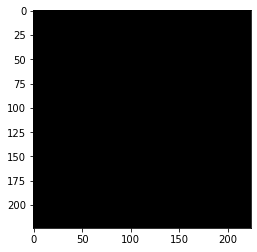

In [46]:
image2 = Image.fromarray(image)
plt.imshow(image2)

In [47]:
im1 = Image.fromarray(vis)
plt.imshow(im1)

TypeError: Cannot handle this data type: (1, 1, 6), |u1

In [48]:
vis

array([[[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0

# Create training and validation sets

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   template                        23924 non-null  object 
 1   docked                          23924 non-null  object 
 2   rmsd                            23924 non-null  float64
 3   uniprot_id                      23924 non-null  object 
 4   smiles_template                 23924 non-null  object 
 5   smiles_docked                   23924 non-null  object 
 6   mcs_smartsString                23924 non-null  object 
 7   template_HeavyAtomCount         23924 non-null  int64  
 8   template_NHOHCount              23924 non-null  int64  
 9   template_NOCount                23924 non-null  int64  
 10  template_RingCount              23924 non-null  int64  
 11  template_NumHAcceptors          23924 non-null  int64  
 12  template_NumHDonors             

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=666, stratify=df['bin_RMSD'])
df.loc[x_train, 'is_valid']=False
df.loc[x_valid, 'is_valid']=True

In [18]:
df.is_valid.value_counts()

False    19139
True      4785
Name: is_valid, dtype: int64

In [19]:
train = df[df.is_valid == False]
valid = df[df.is_valid == True]
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
len(train), len(valid)

(19139, 4785)

In [20]:
train.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity,is_valid
0,1YPJ_UIB,1K22_MEL,4.643,P00734,CC[C@@H]1[C@@H]2[C@H](C(=O)N1Cc1ccc3c(c1)OCO3)...,N=C(N)c1ccc(CNC(=O)[C@@H]2CCN2C(=O)[C@H](NCC(=...,[#7]=[#6](-[#7])-[#6]1:[#6]:[#6]:[#6](:[#6]:[#...,33,3,7,...,3,4,7,0.165775,0.289941,1.535361,3,-0.342246,-0.100592,False
1,2JH5_895,1C5O_BAM,3.209,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,NC(=[NH2+])c1ccccc1,"[#7]-[#6]-[#6]:,-[#6]:,-[#6]",28,1,8,...,1,0,1,0.050847,0.059829,1.165959,3,-1.491525,-2.401709,False
2,5Y12_8JX,1TOW_CRZ,1.769,P15090,COc1ccc(S(=O)(=O)NCCCCC(=O)O)c2ccccc12,O=C(O)CCCn1c2ccccc2c2ccccc21,[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1:[#6]:[#6]:[#6...,23,2,6,...,0,0,0,0.324561,0.324561,0.570414,1,1.245614,0.245614,False
3,1C1U_BAI,5AHG_Y4L,3.943,P00734,N=C(N)c1ccc2[nH]c(Cc3nc4ccccc4[nH]3)nc2c1,CN(C)S(=O)(=O)Nc1ccc(Cl)cc1,"[#7]-,:[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1",22,5,6,...,1,0,1,0.086957,0.106195,1.371942,3,-1.130435,-1.938053,False
4,2W26_RIV,2Y80_439,7.217,P00742,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,CN(C)[C@@H]1CCc2cc(N3CC[C@H](NS(=O)(=O)c4ccc5c...,[#7]-[#6]-[#6]-[#6]-[#7](-[#6]1:[#6]:[#6]:[#6]...,29,1,8,...,1,3,2,0.187166,0.283237,1.976439,3,-0.128342,-0.167630,False


In [21]:
valid.head()

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity,is_valid
0,1LPZ_CMB,2XBX_RR8,9.858,P00742,Cc1cccc2c1cc(C(=O)NCc1cc(Cl)cc(Cl)c1)n2Cc1cccc...,CS(=O)(=O)N1C[C@H](C(=O)Nc2ccc(Cl)cc2)[C@@H](C...,"[#6]-[#6](:,-[#6]):,-[#6](:,-[#6]:,-[#7]-[#6]-...",32,4,5,...,1,2,3,0.167488,0.227979,2.288283,3,-0.325123,-0.720207,True
1,5HZ6_65Y,5Y12_8JX,3.686,P15090,CC(C)c1cccc(-c2c(C(=O)O)c(C(C)C)nc3ccc(Cl)cc23)c1,COc1ccc(S(=O)(=O)NCCCCC(=O)O)c2ccccc12,"[#8]-[#6]:,-[#6]:[#6]:,-[#6]:[#6]:[#6]:[#6]:[#...",26,1,3,...,0,3,1,0.151724,0.227941,1.304542,3,-0.482759,-0.720588,True
2,1Y2K_7DE,1XON_PIL,7.237,Q08499,CCOC(=O)c1c(C)nn(-c2cccc([N+](=O)[O-])c2)c1C,COc1ccc(C(=O)Nc2c(Cl)cncc2Cl)cc1OC1CCCC1,"[#6](:[#6]:[#7]):[#6](:,-[#7]-[#6]:,-[#6]:[#6]...",21,0,7,...,1,1,2,0.128571,0.170370,1.979207,3,-0.714286,-1.296296,True
3,4LAU_W8X,4LBS_4O8,1.851,P15121,O=C(O)COc1cc(Cl)ccc1C(=O)NCc1ccc(Br)cc1,O=C(O)COc1cc(Cl)ccc1C(=O)NCc1c(F)cc(Br)cc1F,[#8]=[#6](-[#8])-[#6]-[#8]-[#6]1:[#6]:[#6](-[#...,23,2,5,...,2,6,6,0.567308,0.697917,0.615726,1,3.673077,3.979167,True
4,4LB3_M15,4LAU_W8X,0.820,P15121,O=C(O)COc1cc(Cl)ccc1C(=O)NCc1ccc(I)cc1F,O=C(O)COc1cc(Cl)ccc1C(=O)NCc1ccc(Br)cc1,[#8]=[#6](-[#8])-[#6]-[#8]-[#6]1:[#6]:[#6](-[#...,24,2,5,...,2,6,6,0.578431,0.788889,-0.198451,1,3.784314,4.888889,True


In [22]:
len(valid)/len(train)

0.25001306233345527

In [11]:
dataset = '../dataset/oldsmiledata'

In [14]:
dataset= 'oldsmiledata'

In [15]:
train.to_csv(path/f'train_balanced_{dataset}.csv')
valid.to_csv(path/f'valid_balanced_{dataset}.csv')

NameError: name 'valid' is not defined

In [17]:
train_df = pd.read_csv(path/f'train_balanced_{dataset}.csv')
train_df.head()

,Unnamed: 0,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,...,mcs_template_NumHDonors,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity
0,0,1YPJ_UIB,1K22_MEL,4.643,P00734,CC[C@@H]1[C@@H]2[C@H](C(=O)N1Cc1ccc3c(c1)OCO3)...,N=C(N)c1ccc(CNC(=O)[C@@H]2CCN2C(=O)[C@H](NCC(=...,[#7]=[#6](-[#7])-[#6]1:[#6]:[#6]:[#6](:[#6]:[#...,33,3,...,2,3,4,7,0.165775,0.289941,1.535361,3,-0.342246,-0.100592
1,1,2JH5_895,1C5O_BAM,3.209,P00734,C[C@@H](C(=O)N1CCOCC1)N1CC[C@H](NS(=O)(=O)/C=C...,NC(=[NH2+])c1ccccc1,"[#7]-[#6]-[#6]:,-[#6]:,-[#6]",28,1,...,0,1,0,1,0.050847,0.059829,1.165959,3,-1.491525,-2.401709
2,2,5Y12_8JX,1TOW_CRZ,1.769,P15090,COc1ccc(S(=O)(=O)NCCCCC(=O)O)c2ccccc12,O=C(O)CCCn1c2ccccc2c2ccccc21,[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1:[#6]:[#6]:[#6...,23,2,...,0,0,0,0,0.324561,0.324561,0.570414,1,1.245614,0.245614
3,3,1C1U_BAI,5AHG_Y4L,3.943,P00734,N=C(N)c1ccc2[nH]c(Cc3nc4ccccc4[nH]3)nc2c1,CN(C)S(=O)(=O)Nc1ccc(Cl)cc1,"[#7]-,:[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1",22,5,...,1,1,0,1,0.086957,0.106195,1.371942,3,-1.130435,-1.938053
4,4,2W26_RIV,2Y80_439,7.217,P00742,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,CN(C)[C@@H]1CCc2cc(N3CC[C@H](NS(=O)(=O)c4ccc5c...,[#7]-[#6]-[#6]-[#6]-[#7](-[#6]1:[#6]:[#6]:[#6]...,29,1,...,1,1,3,2,0.187166,0.283237,1.976439,3,-0.128342,-0.167630


### Checks in dataset

In [25]:
np.mean(df.log_RMSD)

1.443270973118679

In [26]:
log_RMSD = df.log_RMSD

<AxesSubplot:ylabel='Density'>

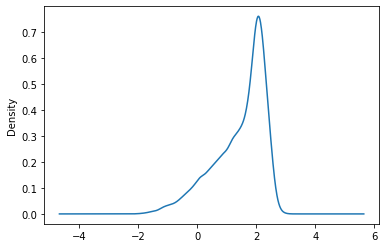

In [27]:
log_RMSD.plot.kde()

<AxesSubplot:ylabel='Density'>

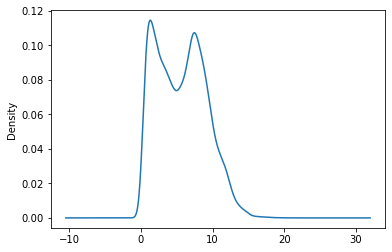

In [28]:
rmsd = df.rmsd
rmsd.plot.kde()

<AxesSubplot:ylabel='Density'>

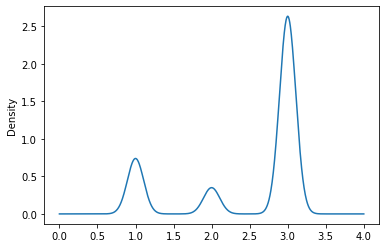

In [29]:
bin_rmsd = df.bin_RMSD
bin_rmsd.plot.kde()

(array([0.00283709, 0.01799525, 0.04206997, 0.08876033, 0.15360806,
        0.21618612, 0.29627307, 0.51675536, 0.57066003, 0.03412612]),
 array([-2.09557092, -1.57991334, -1.06425576, -0.54859818, -0.03294059,
         0.48271699,  0.99837457,  1.51403215,  2.02968974,  2.54534732,
         3.0610049 ]),
 <BarContainer object of 10 artists>)

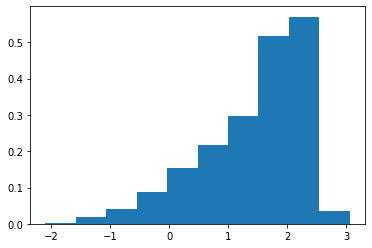

In [30]:
plt.hist(log_RMSD, density=True)

In [31]:
print(np.log(2.72))

1.000631880307906


### Checking poseview and create file for uniprot id names

In [32]:
ligand = df[df.template == '1NVQ_UCN']
ligand

,template,docked,rmsd,uniprot_id,smiles_template,smiles_docked,mcs_smartsString,template_HeavyAtomCount,template_NHOHCount,template_NOCount,...,mcs_docked_NumHDonors,mcs_template_NumRotatableBonds,mcs_docked_NumRotatableBonds,ec_tanimoto_similarity,fc_tanimoto_similarity,log_RMSD,bin_RMSD,Xtransf_ec_tanimoto_similarity,Xtransf_fc_tanimoto_similarity,is_valid
460,1NVQ_UCN,4JIK_1KO,2.261,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,NC(=O)c1ncc(N[C@H]2CCCNC2)c2nc(-c3ccc(Cl)cc3)cn12,"[#6]-[#6]:,-[#7](:[#6]:[#6]-,:[#6]:[#6]:[#6]:[...",36,3,8,...,1,0,4,0.108374,0.165803,0.815807,2,-0.916256,-1.341969,False
523,1NVQ_UCN,3PA3_C70,2.240,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,NC(=O)c1nnc(N[C@H]2CCCNC2)c2cc(-c3ccc(Cl)cc3)sc12,"[#6]-,:[#6]:[#6]:[#6](:[#6]-,:[#7]-,:[#6]-,:[#...",36,3,8,...,2,0,4,0.108374,0.184211,0.806476,2,-0.916256,-1.157895,True
1168,1NVQ_UCN,2YER_TQ1,7.233,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,O=c1[nH]nc2cc(CO)c3ccc(-c4ccc[nH]4)cc3n12,"[#8]=[#6]:,-[#7]:,-[#6]:,-[#6](:[#6](:[#6]:[#6...",36,3,8,...,1,0,2,0.135870,0.167598,1.978654,3,-0.641304,-1.324022,False
3358,1NVQ_UCN,2XF0_4UB,3.412,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,c1ccc(-c2cnc3cnc(-c4cn[nH]c4)cn23)cc1,"[#6](:[#6]:[#6]:[#6]-,:[#6](:[#6]):[#7](:,-[#6...",36,3,8,...,0,1,2,0.118280,0.136612,1.227299,3,-0.817204,-1.633880,True
3741,1NVQ_UCN,2CGU_3A3,3.312,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,O=C(O)COc1ccc2c(c1)C(=NO)c1cc(OCC(=O)O)ccc1-2,"[#8]-[#6]:,-[#6]:[#6](:[#6](:[#6]:[#6])-,:[#6]...",36,3,8,...,0,0,1,0.100503,0.146597,1.197552,3,-0.994975,-1.534031,False
3762,1NVQ_UCN,2YM8_YM8,7.155,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,C[C@H](CN(C)C)Oc1nc(Nc2cc3cccc(Cl)c3cn2)cnc1C#N,"[#6]-[#8]-[#6]:,-[#6](:,-[#7]:[#6]:[#6]-,:[#7]...",36,3,8,...,1,1,4,0.106796,0.175258,1.967811,3,-0.932039,-1.247423,False
4159,1NVQ_UCN,4RVK_3XK,8.449,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CC(=O)Nc1cccc(-c2cnc3[nH]c4cnc(C#N)cc4c3c2)c1,"[#6]-[#6](=[#8])-[#7]-[#6]:,-[#6]:[#6](:[#6]:[...",36,3,8,...,1,0,2,0.125628,0.185185,2.134048,3,-0.743719,-1.148148,True
4684,1NVQ_UCN,2XEZ_XEZ,6.747,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,c1cc(-c2cnc3cnc(-c4cn[nH]c4)cn23)n[nH]1,"[#6](:,-[#6]:[#6]-,:[#6]:[#6]:[#7]:[#6]:[#6]:[...",36,3,8,...,1,0,2,0.079365,0.079365,1.909098,3,-1.206349,-2.206349,False
6341,1NVQ_UCN,4QYF_3DV,6.314,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,Nc1ncc(-c2cccc(O)c2)nc1-c1ccc(C(=O)O)cc1,"[#6](:[#7]:[#6]:[#6]-,:[#6]:[#6]:[#6]:[#6]:[#6...",36,3,8,...,0,0,3,0.115789,0.171271,1.842769,3,-0.842105,-1.287293,False
6351,1NVQ_UCN,2WMQ_ZYQ,5.214,O14757,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CC(=O)Nc1nc2c(s1)C(=O)NCCC2,"[#6]:,-[#7]:[#6](:[#6])-,:[#6]-,:[#6]-[#6]-[#7...",36,3,8,...,1,0,0,0.063218,0.134969,1.651347,3,-1.367816,-1.650307,False


In [33]:
def get_image (molname):
    image = Image.open(IMAGES + molname + '.png')
    return image

In [34]:
def get_image_with_env (molname):
    IMAGES = dataset + '/mol_images/poseview_envs/'
    image = Image.open(IMAGES + molname + '.png')
    return image

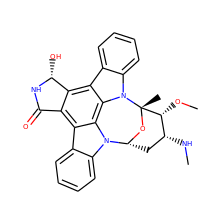

In [35]:
image = get_image(ligand.iloc[0].template)
image

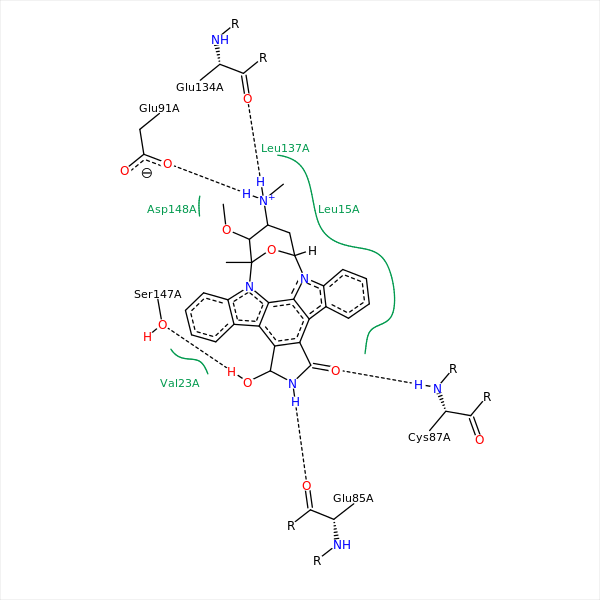

In [40]:
img_env = get_image_with_env(ligand.iloc[0].template)
img_env

In [18]:
img_env.size

(600, 600)

In [19]:
templates = df.template.unique()
docked = df.docked.unique()
len(docked), len(templates)

(1066, 1053)

In [20]:
all_names = np.concatenate((templates, docked))
all_names, len(all_names)

(array(['1YPJ_UIB', '2JH5_895', '5Y12_8JX', ..., '2WK6_IUR', '1OF8_PEP',
        '1JJE_BYS'], dtype=object),
 2119)

In [21]:
all_names_unique = np.unique(all_names)
all_names_unique, len(all_names_unique)

(array(['1A28_STR', '1A4W_QWE', '1A9P_9DI', ..., '6QXG_UFP', '6RCW_JX2',
        '6ROT_KDQ'], dtype=object),
 1076)

In [22]:
with open('../dataset/all_unique_ids.txt', 'w') as f:
    for name in all_names_unique:
        f.write("%s\n" % name)

In [23]:
IMAGES = dataset + '/mol_images/poseview_envs/'

# Check images

In [24]:
from PIL import ImageChops

In [25]:
for name in all_names_unique:
    img = get_image_with_env(name)
    assert ImageChops.invert(img).getbbox()